In [ ]:
# Importing required libraries
import nltk
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
#Loading the dataset
df = pd.read_csv("dataset.txt", sep = ';')

In [ ]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.columns

Index(['name', 'review', 'sentiment'], dtype='object')

In [ ]:
df['review'] = df['review'].str.lower()

In [ ]:
from string import punctuation

In [ ]:
df['review'] = df['review'].str.replace('[{}]'.format(punctuation), '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df['review']

0       very soft and comfortable and warmer than it l...
1       this is a product well worth the purchase  i h...
2       all of my kids have cried nonstop when i tried...
3       when the binky fairy came to our house we didn...
4       lovely book its bound tightly so you may not b...
                              ...                        
3935    the seller was great however the product only ...
3936    the breast shells arrived within 10 days of or...
3937                                                 good
3938    i ordered these because i had very sore nipple...
3939    i bought these breast shells especially for th...
Name: review, Length: 3940, dtype: object

In [ ]:
#Check if there are any null values
data_v1 = df[['review','sentiment']]
data_v1.isnull().sum()

review       0
sentiment    0
dtype: int64

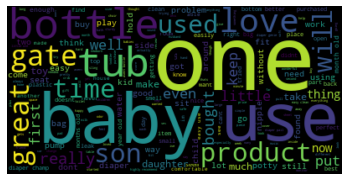

In [ ]:
common_words=''
for i in data_v1.review:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Encoded the target column
lb=LabelEncoder()
data_v1['sentiment'] = lb.fit_transform(data_v1['sentiment'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data_v1['review'].values)
X = tokenizer.texts_to_sequences(data_v1['review'].values)
X = pad_sequences(X)

In [ ]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 949, 120)          60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 949, 120)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(data_v1['sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [15]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
87/87 [==============================] - 449s 5s/step - loss: 0.4999 - accuracy: 0.7897
Epoch 2/5
87/87 [==============================] - 437s 5s/step - loss: 0.3774 - accuracy: 0.8281
Epoch 3/5
87/87 [==============================] - 439s 5s/step - loss: 0.3131 - accuracy: 0.8735
Epoch 4/5
87/87 [==============================] - 434s 5s/step - loss: 0.2790 - accuracy: 0.8861
Epoch 5/5
87/87 [==============================] - 439s 5s/step - loss: 0.2538 - accuracy: 0.8923


In [17]:
model.evaluate(X_test,y_test)

37/37 [==============================] - 57s 1s/step - loss: 0.4606 - accuracy: 0.7707


[0.4606100618839264, 0.7707275748252869]

In [18]:
y_pred = model.predict(X_test)

In [ ]:
X_x = tokenizer.texts_to_sequences(['good', 'bad'])
X_x = pad_sequences(X)

In [19]:
y_pred = y_pred.argmax(axis=1)

In [20]:
y_test[1]

3575    0
733     1
196     1
869     1
2717    1
       ..
1221    1
2004    0
3176    1
1779    1
111     1
Name: 1, Length: 1182, dtype: uint8

In [21]:
matrix = confusion_matrix(y_test[1], y_pred)

In [22]:
matrix

array([[136, 111],
       [160, 775]])

In [23]:
import numpy as np

In [24]:
(unique, counts) = np.unique(y_pred, return_counts=True)

In [25]:
frequencies = np.asarray((unique, counts)).T

In [26]:
frequencies

array([[  0, 296],
       [  1, 886]])